In [1]:
# IMPORTAÇÃO DE OUTRAS BIBLIOTECAS
import pandas as pd
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab



# IMPORTAÇÃO DAS BIBLIOTECAS DE MACHINE LEARNING
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier


from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, classification_report,  recall_score, accuracy_score, precision_score, confusion_matrix, f1_score


classifier_name = 'kNN'
classifier_roc_name = 'Curva ROC - kNN'


In [2]:
def plot_roc_curve_folds(fp, tp, n_folds, sup_title, clf_name):
    fig, axs = plt.subplots(nrows=1, ncols=n_folds, sharey=True, sharex=True, figsize=(15,5))

    for fold in range(n_folds):
        axs[fold].plot(fp, tp)
        axs[fold].set_title('Fold ' + str(fold))
        axs[fold].set_xlabel('FP rate', fontsize=12)
        axs[fold].set_ylabel('TP rate', fontsize=12)

        axs[fold].grid(linewidth=0.25)

        #remove bounding box around the graphs 
        axs[fold].spines['left'].set_visible(False)
        axs[fold].spines['top'].set_visible(False)
        axs[fold].spines['right'].set_visible(False)  

    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    fig.suptitle(sup_title)

    fig.savefig(f"{clf_name}_curves.png")


In [3]:
# registros = pd.read_csv('dataset.csv', sep=';', encoding='utf-8-sig')
registros = pd.read_pickle('dataset.pkl', compression='bz2')
registros

,ApplicationProtocolName,MinInterArrivalTimePacketsUpAndDownFlow.FeatureValue,MinInterArrivalTimePacketsUpFlow.FeatureValue,MinInterArrivalTimePacketsDownFlow.FeatureValue,MedianInterArrivalTimePacketsUpAndDownFlow.FeatureValue,MedianInterArrivalTimePacketsUpFlow.FeatureValue,MedianInterArrivalTimePacketsDownFlow.FeatureValue,MedianInterArrivalTimeUpAndDownFlow.FeatureValue,MedianInterArrivalTimeDownFlow.FeatureValue,MedianInterArrivalTimeUpFlow.FeatureValue,...,ByteFrequencyDownFlow.FeatureValue,PacketLengthDistributionUpFlow.FeatureValue,PacketLengthDistributionDownFlow.FeatureValue,TransportProtocolType.FeatureValue,EntropyUpFlow.FeatureValue,EntropyDownFlow.FeatureValue,sum,mean,var,std
index,,,,,,,,,,,,,,,,,,,,,
0,53_UDP_Dns,0.000855,0.000000,0.000000,0.000427,0.000000,0.000000,0.000427,0.0,0.0,...,0.030545,0.0,0.0,17.0,2.653902,3.364857,3659.612683,75.455932,1.478013e+05,1.485193e+04
1,53_UDP_Dns,0.000899,0.000000,0.000000,0.000449,0.000000,0.000000,0.000449,0.0,0.0,...,0.028411,0.0,0.0,17.0,2.835371,3.433640,3586.349558,73.945352,1.418100e+05,1.424994e+04
2,53_UDP_Dns,0.019215,0.000000,0.000000,0.009607,0.000000,0.000000,0.009607,0.0,0.0,...,0.029116,0.0,0.0,17.0,2.833135,3.388041,3226.962051,66.535300,1.145839e+05,1.151435e+04
3,53_UDP_Dns,0.001017,0.000000,0.000000,0.000508,0.000000,0.000000,0.000508,0.0,0.0,...,0.030851,0.0,0.0,17.0,2.618355,3.358848,3678.573731,75.846881,1.492115e+05,1.499362e+04
4,53_UDP_Dns,0.000869,0.000000,0.000000,0.000434,0.000000,0.000000,0.000434,0.0,0.0,...,0.028514,0.0,0.0,17.0,2.835371,3.434476,3582.850242,73.873201,1.415374e+05,1.422254e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72145,80_TCP_HTTP,0.000059,0.000395,0.004754,0.000336,0.000640,0.006589,2.603082,0.0,0.0,...,0.024377,0.0,0.0,6.0,3.748287,3.275992,67162.819512,1384.800402,6.630239e+07,6.663507e+06
72146,80_TCP_HTTP,0.000056,0.000417,0.005008,0.000361,0.000724,0.006540,2.523715,0.0,0.0,...,0.023825,0.0,0.0,6.0,3.742167,3.298061,67161.371456,1384.770545,6.630047e+07,6.663314e+06
72147,80_TCP_HTTP,0.000050,0.000328,0.004983,0.000463,0.000909,0.007485,3.019886,0.0,0.0,...,0.022810,0.0,0.0,6.0,3.739260,3.325325,67170.594594,1384.960713,6.631272e+07,6.664544e+06


In [4]:
# extração do vetor de caracteristicas X (Multidimensional), retirando o label da classe
X = registros.drop(columns={'ApplicationProtocolName'})

# extração do vetor de labels y (Uma dimensão só)
y = registros['ApplicationProtocolName']
y = y.map({'53_UDP_Dns': 0, '80_TCP_HTTP': 1}).astype(int)

In [5]:
X.head(5)

,MinInterArrivalTimePacketsUpAndDownFlow.FeatureValue,MinInterArrivalTimePacketsUpFlow.FeatureValue,MinInterArrivalTimePacketsDownFlow.FeatureValue,MedianInterArrivalTimePacketsUpAndDownFlow.FeatureValue,MedianInterArrivalTimePacketsUpFlow.FeatureValue,MedianInterArrivalTimePacketsDownFlow.FeatureValue,MedianInterArrivalTimeUpAndDownFlow.FeatureValue,MedianInterArrivalTimeDownFlow.FeatureValue,MedianInterArrivalTimeUpFlow.FeatureValue,MeanInterArrivalTimePacketsUpAndDownFlow.FeatureValue,...,ByteFrequencyDownFlow.FeatureValue,PacketLengthDistributionUpFlow.FeatureValue,PacketLengthDistributionDownFlow.FeatureValue,TransportProtocolType.FeatureValue,EntropyUpFlow.FeatureValue,EntropyDownFlow.FeatureValue,sum,mean,var,std
index,,,,,,,,,,,,,,,,,,,,,
0,0.000855,0.0,0.0,0.000427,0.0,0.0,0.000427,0.0,0.0,0.000427,...,0.030545,0.0,0.0,17.0,2.653902,3.364857,3659.612683,75.455932,147801.314623,14851.933298
1,0.000899,0.0,0.0,0.000449,0.0,0.0,0.000449,0.0,0.0,0.000449,...,0.028411,0.0,0.0,17.0,2.835371,3.433640,3586.349558,73.945352,141810.028093,14249.938184
2,0.019215,0.0,0.0,0.009607,0.0,0.0,0.009607,0.0,0.0,0.009607,...,0.029116,0.0,0.0,17.0,2.833135,3.388041,3226.962051,66.535300,114583.865317,11514.350696
3,0.001017,0.0,0.0,0.000508,0.0,0.0,0.000508,0.0,0.0,0.000508,...,0.030851,0.0,0.0,17.0,2.618355,3.358848,3678.573731,75.846881,149211.487384,14993.621698
4,0.000869,0.0,0.0,0.000434,0.0,0.0,0.000434,0.0,0.0,0.000434,...,0.028514,0.0,0.0,17.0,2.835371,3.434476,3582.850242,73.873201,141537.366900,14222.541955


In [6]:
y.head(5)

index
0    0
1    0
2    0
3    0
4    0
Name: ApplicationProtocolName, dtype: int32

In [7]:
X = X.to_numpy()
y = y.to_numpy()

In [8]:
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X, y, test_size=0.2, random_state = 40)

print("Lenght train: {} - {:.2f}%".format(len(y_train_or), len(y_train_or)/ len(y)*100))
print("Lenght test:  {} - {:.2f}%".format(len(y_test_or), len(y_test_or)/ len(y)*100))

# Normalização dos dados
scaler = preprocessing.MinMaxScaler()
X_train_or = scaler.fit_transform(X_train_or)
X_test_or = scaler.fit_transform(X_test_or)

Lenght train: 57720 - 80.00%
Lenght test:  14430 - 20.00%


In [9]:
#INSTANCIA O CLASSIFICADOR
#metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
classifier = KNeighborsClassifier(n_neighbors = 3, algorithm='auto', metric = 'euclidean')

In [10]:
#Métricas do Fold
K_FOLDS = 5
skfold = StratifiedKFold(n_splits = K_FOLDS)
skfold.get_n_splits(X_train_or, y_train_or)


#Listas e dicionários utilizados
fold_metrics = []
FP_list = []
TP_list = []
TH_list = []

metrics = {'acc': {}, 'f1score': {},  'recall': {},  'precision': {},  'report': {},  'confussion': {}}

fold_count = 1
for train_index, test_index in skfold.split(X_train_or, y_train_or):
    print('Fold {} / {}'.format(fold_count, K_FOLDS))
    len_train, len_test = len(train_index), len(test_index)
    total = len_train + len_test

    print( 'Train: {} {:.2f}% --- Valid: {} {:.2f}%'.format( len_train, (len_train/total)*100, len_test, (len_test/total)*100 ) )

    X_train, X_test = X_train_or[train_index], X_train_or[test_index]
    y_train, y_test = y_train_or[train_index], y_train_or[test_index]

    print('Training...\n')
    classifier.fit(X_train, y_train.ravel())

    # y_pred_train = classifier.predict(X_train)
    prediction = classifier.predict(X_test)


    #Cálculo das métricas
    acc = accuracy_score(y_test, prediction)
    f1score = f1_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    report = classification_report(y_test,prediction)
    confussion = confusion_matrix(y_test, prediction)
    
    metrics = {'acc': acc, 'f1score': f1score, 'recall': recall, 'precision': precision, 'report': report, 'confussion': confussion}
    

    #Cálculo das curvas ROC
    y_pred_test_prob = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, thr = roc_curve(y_test.ravel(), y_pred_test_prob)
    FP_list.append(fpr)
    TP_list.append(tpr)
    TH_list.append(thr)

    fold_metrics.append(metrics)
    fold_count += 1


Fold 1 / 5
Train: 46176 80.00% --- Valid: 11544 20.00%
Training...

Fold 2 / 5
Train: 46176 80.00% --- Valid: 11544 20.00%
Training...

Fold 3 / 5
Train: 46176 80.00% --- Valid: 11544 20.00%
Training...

Fold 4 / 5
Train: 46176 80.00% --- Valid: 11544 20.00%
Training...

Fold 5 / 5
Train: 46176 80.00% --- Valid: 11544 20.00%
Training...



In [11]:
#IMPRESSÃO DAS MÉTRICAS AVALIADAS EM CADA FOLD (validação do conjunto de dados de treinamento)
print ('--------- MÉTRICAS DE VALIDAÇÃO (POR K-FOLDS) ~~~~ {}:'.format(classifier_name))
fold_count = 1
for fold in fold_metrics:
    print('Fold {} / {}'.format(fold_count, K_FOLDS))
    for metric, value in fold.items():
        print(metric, value)

    fold_count += 1
    print('\n\n')

--------- MÉTRICAS DE VALIDAÇÃO (POR K-FOLDS) ~~~~ kNN:
Fold 1 / 5
acc 1.0
f1score 1.0
recall 1.0
precision 1.0
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      1.00      1.00      4419

    accuracy                           1.00     11544
   macro avg       1.00      1.00      1.00     11544
weighted avg       1.00      1.00      1.00     11544

confussion [[7125    0]
 [   0 4419]]



Fold 2 / 5
acc 1.0
f1score 1.0
recall 1.0
precision 1.0
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       1.00      1.00      1.00      4419

    accuracy                           1.00     11544
   macro avg       1.00      1.00      1.00     11544
weighted avg       1.00      1.00      1.00     11544

confussion [[7125    0]
 [   0 4419]]



Fold 3 / 5
acc 1.0
f1score 1.0
recall 1.0
precision 1.0
report               preci

In [12]:
# IMPRESSÃO DAS MÉTRICAS DE TESTE (utiliza um conjunto de dados que o classificador não viu em nenhuma etapa do k-fold)
prediction = classifier.predict(X_test_or)

print('--------- MÉTRICAS DO TESTE ~~~~ {}:'.format(classifier_name))
print('Accuracy:', accuracy_score(y_test_or, prediction))
print('F1 score:', f1_score(y_test_or, prediction))
print('Recall:', recall_score(y_test_or, prediction))
print('Precision:', precision_score(y_test_or, prediction))
print('\n Classification Report:\n', classification_report(y_test_or,prediction))
print('\n Confussion Matrix:\n',confusion_matrix(y_test_or, prediction))

--------- MÉTRICAS DO TESTE ~~~~ kNN:
Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8846
           1       1.00      1.00      1.00      5584

    accuracy                           1.00     14430
   macro avg       1.00      1.00      1.00     14430
weighted avg       1.00      1.00      1.00     14430


 Confussion Matrix:
 [[8846    0]
 [   0 5584]]


In [13]:
TP_list

[array([0., 1., 1.]),
 array([0., 1., 1.]),
 array([0., 1., 1.]),
 array([0., 1., 1.]),
 array([0., 1., 1.])]

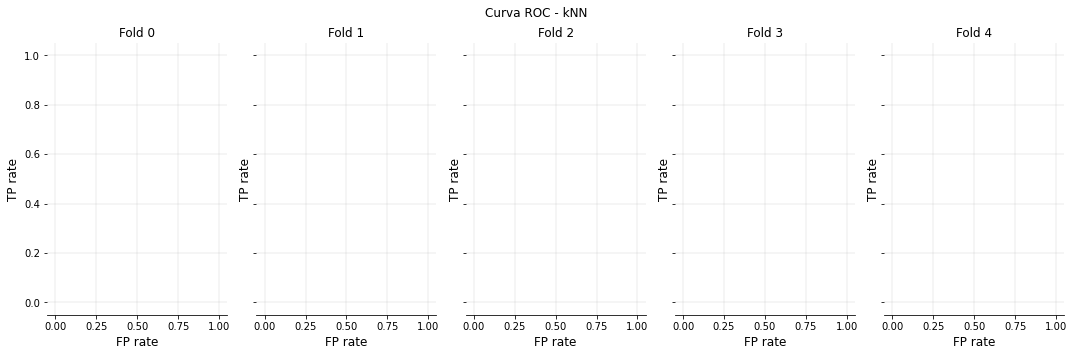

In [14]:
plot_roc_curve_folds(FP_list, TP_list, K_FOLDS, classifier_roc_name, classifier_name)

In [15]:
# #Métricas do Fold
# K_FOLDS = 5
# skfold = StratifiedKFold(n_splits = K_FOLDS)
# skfold.get_n_splits(X, y)


# #Listas e dicionários utilizados
# fold_metrics = []
# FP_list = []
# TP_list = []
# TH_list = []

# metrics = {'acc': {}, 'f1score': {},  'recall': {},  'precision': {},  'report': {},  'confussion': {}}


# #Instancia o classificador
# classifier = KNeighborsClassifier(n_neighbors = 3, algorithm='auto', metric = 'euclidean')


# fold_count = 1
# for train_index, test_index in skfold.split(X, y):
#     print('Fold {} / 5'.format(fold_count))
#     len_train, len_test = len(train_index), len(test_index)
#     total = len_train + len_test

#     print( 'Train: {} {:.2f}% --- Test: {} {:.2f}%'.format( len_train, (len_train/total)*100, len_test, (len_test/total)*100 ) )

#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     print('Training...\n')
#     classifier.fit(X_train, y_train.ravel())

#     # y_pred_train = classifier.predict(X_train)
#     prediction = classifier.predict(X_test)


#     #Cálculo das métricas
#     acc = accuracy_score(y_test, prediction)
#     f1score = f1_score(y_test, prediction)
#     recall = recall_score(y_test, prediction)
#     precision = precision_score(y_test, prediction)
#     report = classification_report(y_test,prediction)
#     confussion = confusion_matrix(y_test, prediction)
    
#     metrics = {'acc': acc, 'f1score': f1score, 'recall': recall, 'precision': precision, 'report': report, 'confussion': confussion}
    

#     #Cálculo das curvas ROC
#     y_pred_test_prob = classifier.predict_proba(X_test)[:, 1]

#     fpr, tpr, thr = roc_curve(y_test.ravel(), y_pred_test_prob)
#     FP_list.append(fpr)
#     TP_list.append(tpr)
#     TH_list.append(thr)

#     fold_metrics.append(metrics)
#     fold_count += 1
